In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Cross-validation over all data

In [3]:
# number of holdouts
sim_num = 100

In [4]:
regressions(df, cities, sim_num, grid_size, do_par = True)

In [5]:
# import data
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
loss = loss.dropna()

In [7]:
loss = loss.replace({'diurnal':'day\n(mean)','diurnalmax':'day\n(max)','nocturnal':'night\n(mean)','nocturnalmax':'night\n(max)'})

<Figure size 504.567x311.84 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


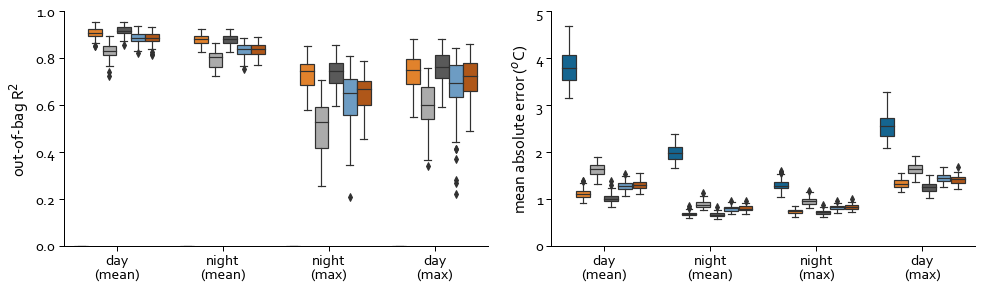

<Figure size 432x288 with 0 Axes>

In [8]:
plot_holdouts(loss, grid_size)